In [1]:
import pandas as pd
import numpy as np

import scipy.stats as sci
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns

In [2]:
data = pd.read_csv("../data/eustockmarket.csv", index_col=0)

In [3]:
data.index = pd.bdate_range(start='6/15/1991', end='8/1/1998')

Business days are not really easy to get. e.g. holidays are ignored in this date range.

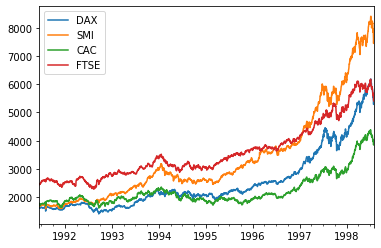

In [4]:
data.plot()

The histogram of the untransformed data is extremely wide and does not show a normal distribution. This is expected, since the underlying data has a trend

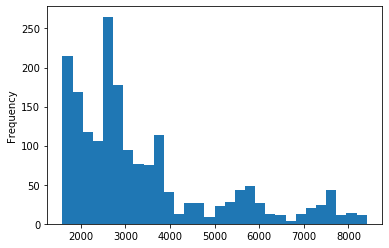

In [5]:
data["SMI"].plot(kind="hist", bins=30)

With the difference of the data, the trend is removed and the data has a more normally shaped distribution.

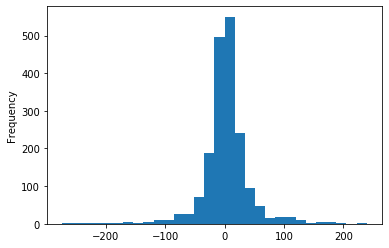

In [6]:
data["SMI"].diff().plot(kind="hist", bins=30)

In [7]:
diff_data = pd.DataFrame([data["SMI"].diff(), data["DAX"].diff()]).T

Correlation can be removed with a time series lag or at least as in this case, weakened. 

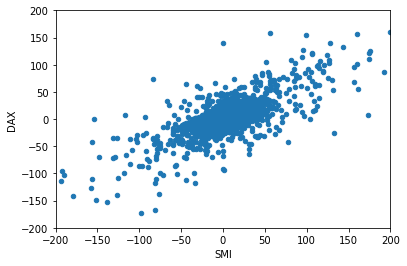

In [8]:
diff_data.plot.scatter(x="SMI", y="DAX", xlim=[-200,200], ylim=[-200,200])

## Time servies specific methods

Stationarity  helps to assess, how stable a system is or if it is constantly changing.  If we know much about the long-term past behavoiur, it is easier to reflect the long-term future behaviour. After knowing about the stationarity of a time series, we need to determine, if there are internal dynamics with reoccuring patterns like seasonality in the time series.  This is, where we look for correlations . Also to make sure we identify relationships based on dynamics we want to imply by causality, we need to have a look for spurious correlations. 

### Stationarity

This is an example of a non-stationary time series.  There are several traits to assess, if a process is stationary or not:

- mean value is increasing over time
- variance is increasing over time (distance between peak and trough on a yearly basis is growing)
- the process displays a strong seasonal behaviour

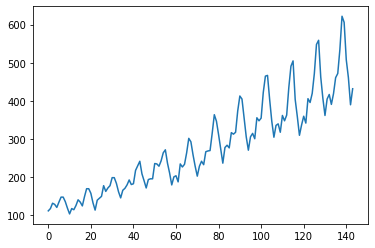

In [9]:
data = pd.read_csv("../data/AirPassengers.csv")

data["Passengers"].plot()

The augmented Dickey-Fuller (ADF) test is the most commonly used hypothesis test to assess stationarity. The null hypothesis assumes a unit root is present in time series. Also this test is not very powerful. e.g. to distinguish near roots from unit roots, low sample size,, not looking for all kind of stationarity. Another option is the KPSS test.

Besides stationarity, another assumption is the normality of distribution of the input variables. A common transformation is the Box Cox transformation.

### Applying window functions

Rolling windows are the most important eda tools on time series data.

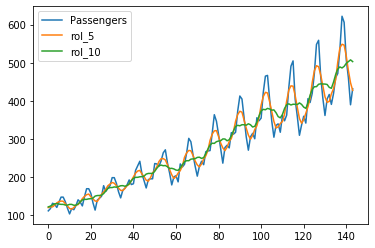

In [10]:
data["rol_5"] = data["Passengers"].rolling(window=5, min_periods=3, center=True).mean()
data["rol_10"] = data["Passengers"].rolling(window=10, min_periods=5, center=True).mean()

data[["Passengers", "rol_5", "rol_10"]].plot()

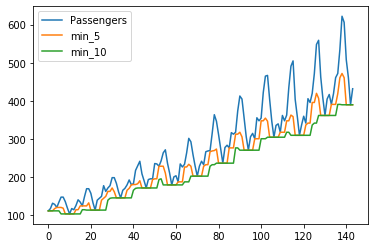

In [11]:
data["min_5"] = data["Passengers"].rolling(window=5, min_periods=3, center=True).min()
data["min_10"] = data["Passengers"].rolling(window=10, min_periods=3, center=True).min()

data[["Passengers", "min_5", "min_10"]].plot()

### Self-correlation

Self-correlation is the idea, that a value in a time series has a correlation to another value in the time series. Correlation is the similarity between observations as a function of the time lag between them.

In [12]:
x = np.arange(1,100)
y = np.sin(x*np.pi/3)

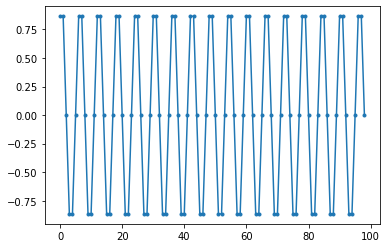

In [13]:
pd.Series(y).plot(style='.-')

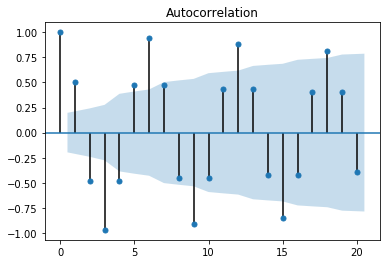

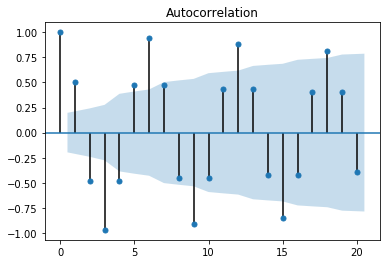

In [14]:
plot_acf(y)

In [15]:
np.corrcoef(y[:-1], y[1:])

array([[1.       , 0.5037152],
       [0.5037152, 1.       ]])

In [16]:
np.corrcoef(y[:-2], y[2:])

array([[ 1.        , -0.49617829],
       [-0.49617829,  1.        ]])

In [17]:
pd.Series(y).corr(pd.Series(y).shift(1))

0.5037151971531032

In [18]:
pd.Series(y).corr(pd.Series(y).shift(2))

-0.4961782879177757

### partial correlation

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


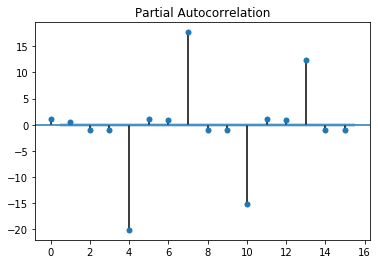

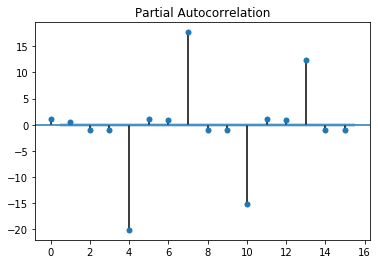

In [19]:
plot_pacf(y[:30])

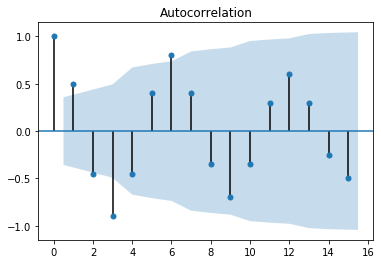

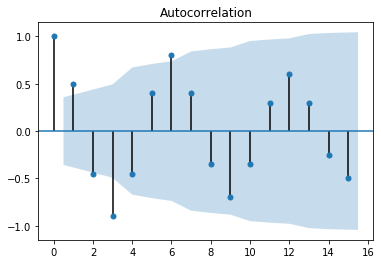

In [20]:
y = np.sin(x*np.pi/3)
plot_acf(y[:30])

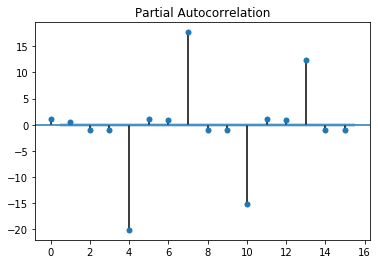

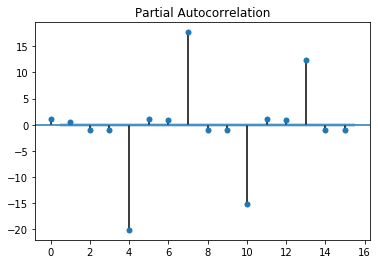

In [21]:
plot_pacf(y[:30])

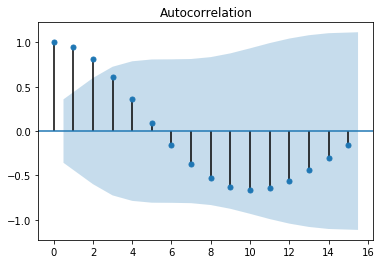

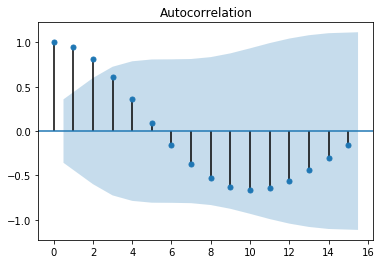

In [22]:
y = np.sin(x*np.pi/10)
plot_acf(y[:30])

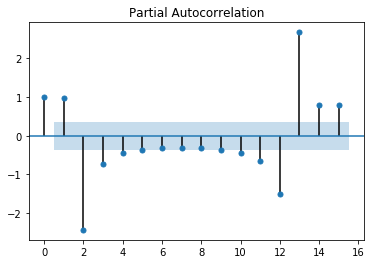

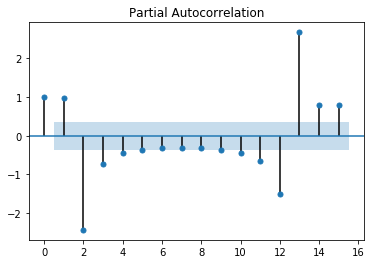

In [23]:
plot_pacf(y[:30])

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

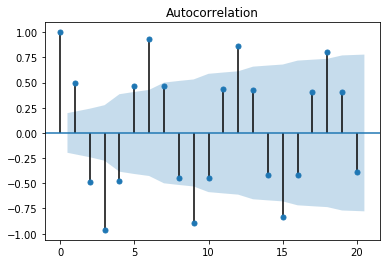

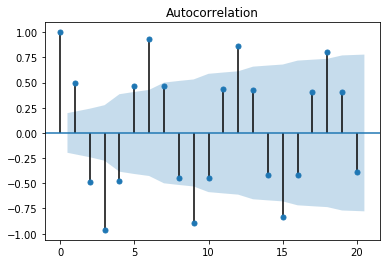

In [24]:
noise = np.random.normal(0, 0.05, 99)

y = np.sin(x*np.pi/3) + noise
plot_acf(y)

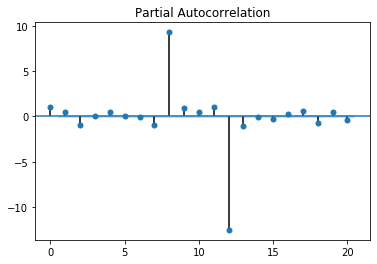

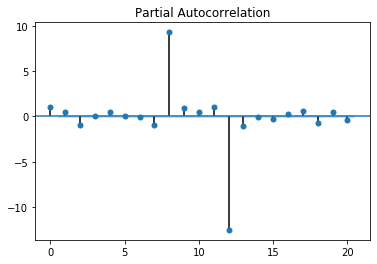

In [25]:
plot_pacf(y)

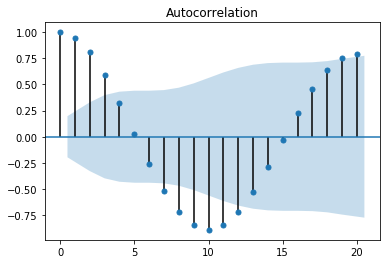

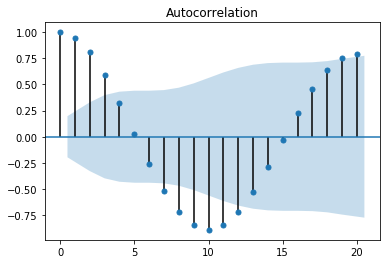

In [26]:
y = np.sin(x*np.pi/10) + noise
plot_acf(y)

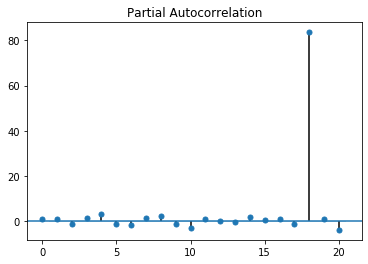

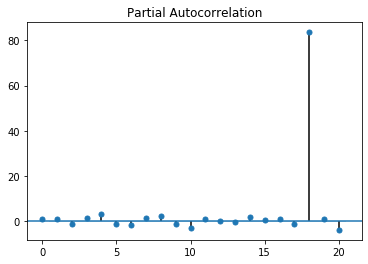

In [27]:
plot_pacf(y)

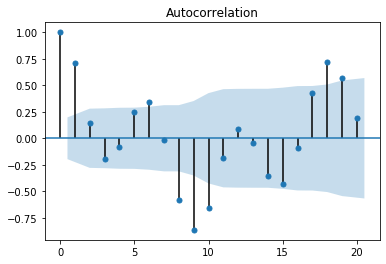

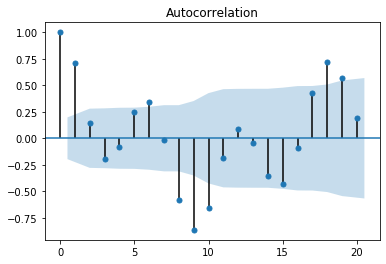

In [28]:
y = np.sin(x*np.pi/10) + noise + np.sin(x*np.pi/3) + noise
plot_acf(y)

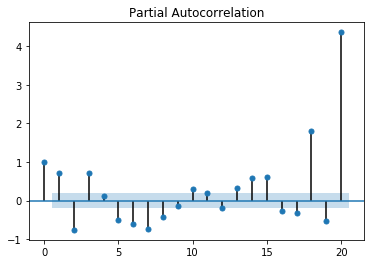

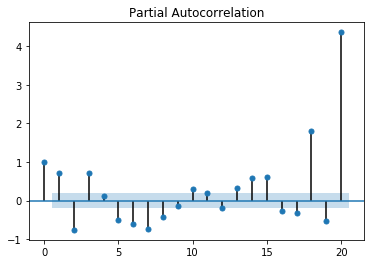

In [29]:
plot_pacf(y)

In [30]:
x = np.arange(1000)

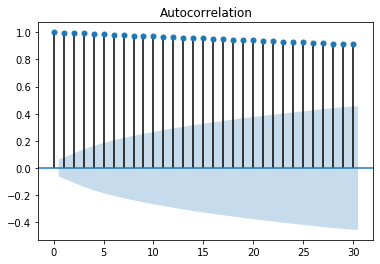

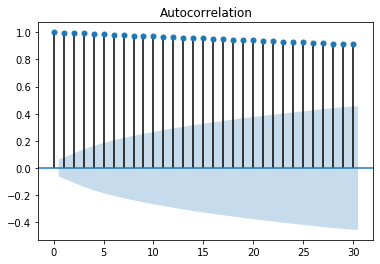

In [31]:
plot_acf(x)

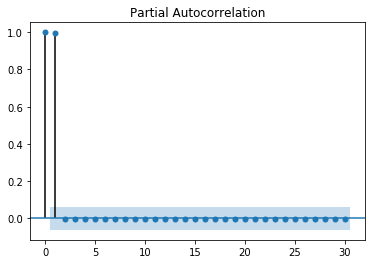

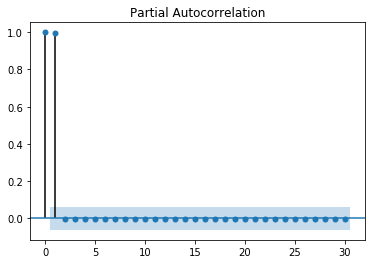

In [32]:
plot_pacf(x)

Hre the ACF is not informative, since the values are quite similar for each lag, so all lags are equally correlated to the data. So, it is quite unclear to get some meaning out of this.

For PACF it is easier. The only significant correlation is at lag 1. So, for a known poiny in time, you only need to know the point just before it. So all information of the series can possibly given by your point in time. This is due to the fact that the next point in time is + 1 of the old one.

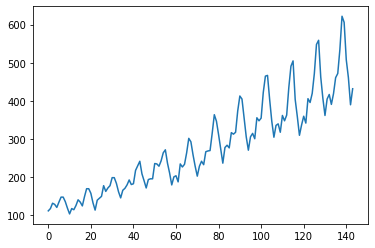

In [33]:
data["Passengers"].plot()

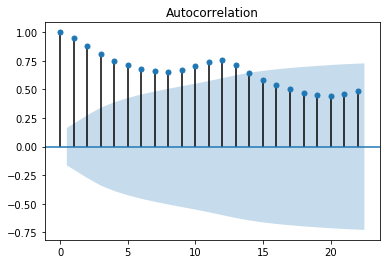

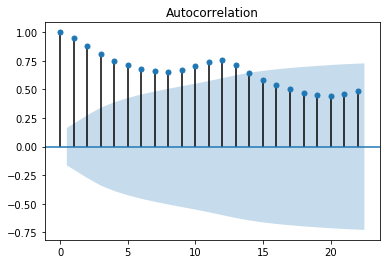

In [34]:
plot_acf(data["Passengers"])

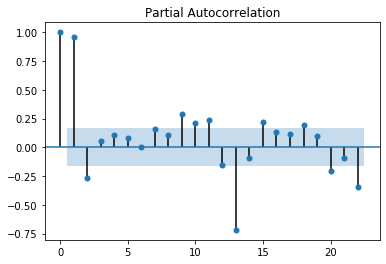

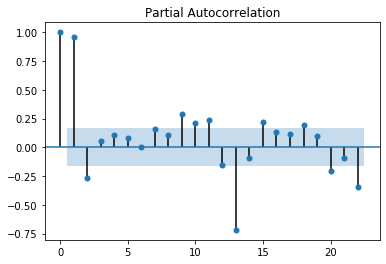

In [35]:
plot_pacf(data["Passengers"])


The ACF has so many critical values, since it has a trend.

The PACF has a critical value for a large lag, which is the seasonality.

### Spurious correlation

Spurious correlations are nonsense correlations.

In [36]:
data['prepare_time'] = [i.split('-') for i in data["Month"]]

data["year"] = [i[0] for i in data['prepare_time']]
data["month"] = [i[1] for i in data['prepare_time']]

In [37]:
data_pivot = pd.pivot_table(data, values='Passengers', index=['month'], columns=['year'], aggfunc=np.mean)

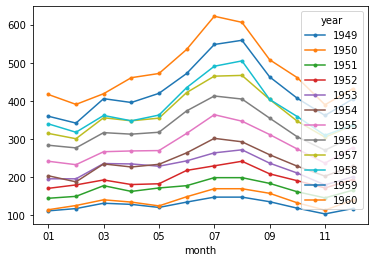

In [38]:
data_pivot.plot(style=".-")

In [39]:
data_pivot = pd.pivot_table(data, values='Passengers', index=['year'], columns=['month'], aggfunc=np.mean)

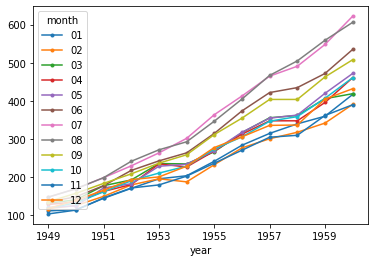

In [40]:
data_pivot.plot(style=".-")

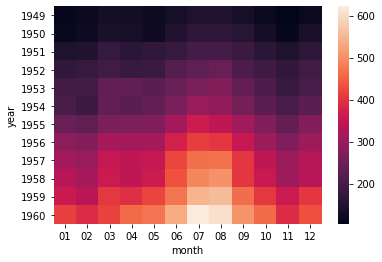

In [41]:
sns.heatmap(data_pivot)